In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from music21.stream import Stream
from music21.clef import Clef
from music21.note import Note
from music21.duration import Duration
from music21 import midi

In [3]:
def step(data, patterns, padding=None, padding_type=None):
    data = np.asarray(data, dtype=np.bool)
    assert len(data.shape) == 1
    patterns = np.asarray(patterns, dtype=np.bool)
    assert len(patterns.shape) == 2
    
    k = patterns.shape[1]
    
    if padding is None:
        padding = k // 2
        
    if padding_type is None:
        padding_type = lambda n, dtype: np.random.randint(0, 2, n, dtype=dtype)
    
    result = padding_type(data.shape[0], dtype=np.bool)
    for (p,), _ in np.ndenumerate(data[:-k]):
        result[padding + p] = np.any(np.all(patterns == data[p : p+k], axis=1))
    return result

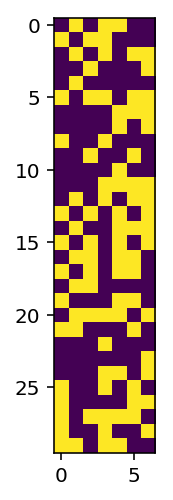

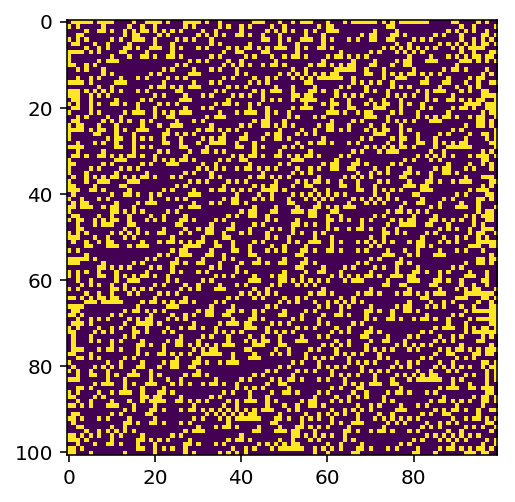

In [137]:
data = [np.random.randint(0, 2, 100, dtype=np.bool)]
patterns = np.random.randint(0, 2, (30, 7), dtype=np.bool)

plt.imshow(patterns)
plt.show()

for _ in range(100):
    data.append(step(data[-1], patterns))
plt.imshow(data)

In [126]:
# Skala Ciszy
scale_silent = {
#     20: "C3",
#     21: "C#3",
#     22: "D3",
#     23: "D#3",
#     24: "E3",
#     25: "F3",
#     26: "F#3",
#     27: "G3",
#     28: "G#3",
#     29: "A3",
#     30: "A#3",
#     31: "B3",
#     32: "C4",
#     33: "C#4",
#     34: "D4",
#     34: "D#4",
#     35: "E4",
#     36: "F4",
#     37: "F#4",
#     38: "G4",
#     39: "G#4",
#     40: "A4",
#     41: "A#4",
#     42: "B4",
#     43: "C5",
}

In [106]:
# Pentatonika
scale_pentatonic = {
    20: "C3",
#     21: "C#3",
#     22: "D3",
    23: "D#3",
#     24: "E3",
    25: "F3",
#     26: "F#3",
    27: "G3",
#     28: "G#3",
#     29: "A3",
    30: "A#3",
#     31: "B3",
    32: "C4",
#     33: "C#4",
#     34: "D4",
    34: "D#4",
#     35: "E4",
    36: "F4",
#     37: "F#4",
    38: "G4",
#     39: "G#4",
#     40: "A4",
    41: "A#4",
#     42: "B4",
    43: "C5",
}

In [107]:
# Skala Dorycka
scale_doric = {
    20: "C3",
#     21: "C#3",
    22: "D3",
#     23: "D#3",
    24: "E3",
    25: "F3",
#     26: "F#3",
    27: "G3",
#     28: "G#3",
    29: "A3",
#     30: "A#3",
    31: "B3",
    32: "C4",
#     33: "C#4",
    34: "D4",
#     34: "D#4",
    35: "E4",
    36: "F4",
#     37: "F#4",
    38: "G4",
#     39: "G#4",
    40: "A4",
#     41: "A#4",
    42: "B4",
    43: "C5",
}

In [108]:
# Skala Eolska
scale_aeolian = {
    20: "C3",
#     21: "C#3",
    22: "D3",
    23: "D#3",
#     24: "E3",
    25: "F3",
#     26: "F#3",
    27: "G3",
    28: "G#3",
#     29: "A3",
    30: "A#3",
#     31: "B3",
    32: "C4",
#     33: "C#4",
    34: "D4",
    34: "D#4",
#     35: "E4",
    36: "F4",
#     37: "F#4",
    38: "G4",
    39: "G#4",
#     40: "A4",
    41: "A#4",
#     42: "B4",
    43: "C5",
}

In [109]:
# Skala Harmoniczna
scale_harmonic = {
    20: "C3",
#     21: "C#3",
    22: "D3",
    23: "D#3",
#     24: "E3",
    25: "F3",
#     26: "F#3",
    27: "G3",
    28: "G#3",
#     29: "A3",
#     30: "A#3",
    31: "B3",
    32: "C4",
#     33: "C#4",
    34: "D4",
    34: "D#4",
#     35: "E4",
    36: "F4",
#     37: "F#4",
    38: "G4",
    39: "G#4",
#     40: "A4",
#     41: "A#4",
    42: "B4",
    43: "C5",
}

In [110]:
# Skala Melodyczna
scale_melodic = {
    20: "C3",
#     21: "C#3",
    22: "D3",
    23: "D#3",
#     24: "E3",
    25: "F3",
#     26: "F#3",
    27: "G3",
#     28: "G#3",
    29: "A3",
#     30: "A#3",
    31: "B3",
    32: "C4",
#     33: "C#4",
    34: "D4",
    34: "D#4",
#     35: "E4",
    36: "F4",
#     37: "F#4",
    38: "G4",
#     39: "G#4",
    40: "A4",
#     41: "A#4",
    42: "B4",
    43: "C5",
}

In [111]:
# Skala Bluesowa
scale_blues = {
    20: "C3",
#     21: "C#3",
#     22: "D3",
    23: "D#3",
#     24: "E3",
    25: "F3",
    26: "F#3",
    27: "G3",
#     28: "G#3",
#     29: "A3",
    30: "A#3",
#     31: "B3",
    32: "C4",
#     33: "C#4",
#     34: "D4",
    34: "D#4",
#     35: "E4",
    36: "F4",
    37: "F#4",
    38: "G4",
#     39: "G#4",
#     40: "A4",
    41: "A#4",
#     42: "B4",
    43: "C5",
}

In [112]:
# Skala Jazzowa
scale_jazz = {
    20: "C3",
#     21: "C#3",
    22: "D3",
    23: "D#3",
#     24: "E3",
    25: "F3",
#     26: "F#3",
    27: "G3",
#     28: "G#3",
    29: "A3",
#     30: "A#3",
    31: "B3",
    32: "C4",
#     33: "C#4",
    34: "D4",
    34: "D#4",
#     35: "E4",
    36: "F4",
#     37: "F#4",
    38: "G4",
#     39: "G#4",
    40: "A4",
#     41: "A#4",
    42: "B4",
    43: "C5",
}

In [113]:
# Skala Cygańska
scale_gipsy = {
    20: "C3",
    21: "C#3",
#     22: "D3",
#     23: "D#3",
    24: "E3",
    25: "F3",
#     26: "F#3",
    27: "G3",
    28: "G#3",
    29: "A3",
#     30: "A#3",
#     31: "B3",
    32: "C4",
    33: "C#4",
#     34: "D4",
#     34: "D#4",
    35: "E4",
    36: "F4",
#     37: "F#4",
    38: "G4",
    39: "G#4",
    40: "A4",
#     41: "A#4",
#     42: "B4",
    43: "C5",
}

In [114]:
def make_stream(data, scale, preprocessor=None):
    stream = Stream()
    
    if preprocessor is not None:
        data = preprocessor(data, scale)
    
    for position in range(len(data)):
        for scale_item in scale:
            if data[position][scale_item]:
                if position == 0 or not data[position-1][scale_item]:
                    duration = 1
                    while position + duration < len(data) \
                            and data[position + duration - 1][scale_item]:
                        duration += 1
                    note = Note(scale[scale_item])
                    note.duration = Duration(duration/4)
                    stream.insert(position/2, note)
                    
    return stream

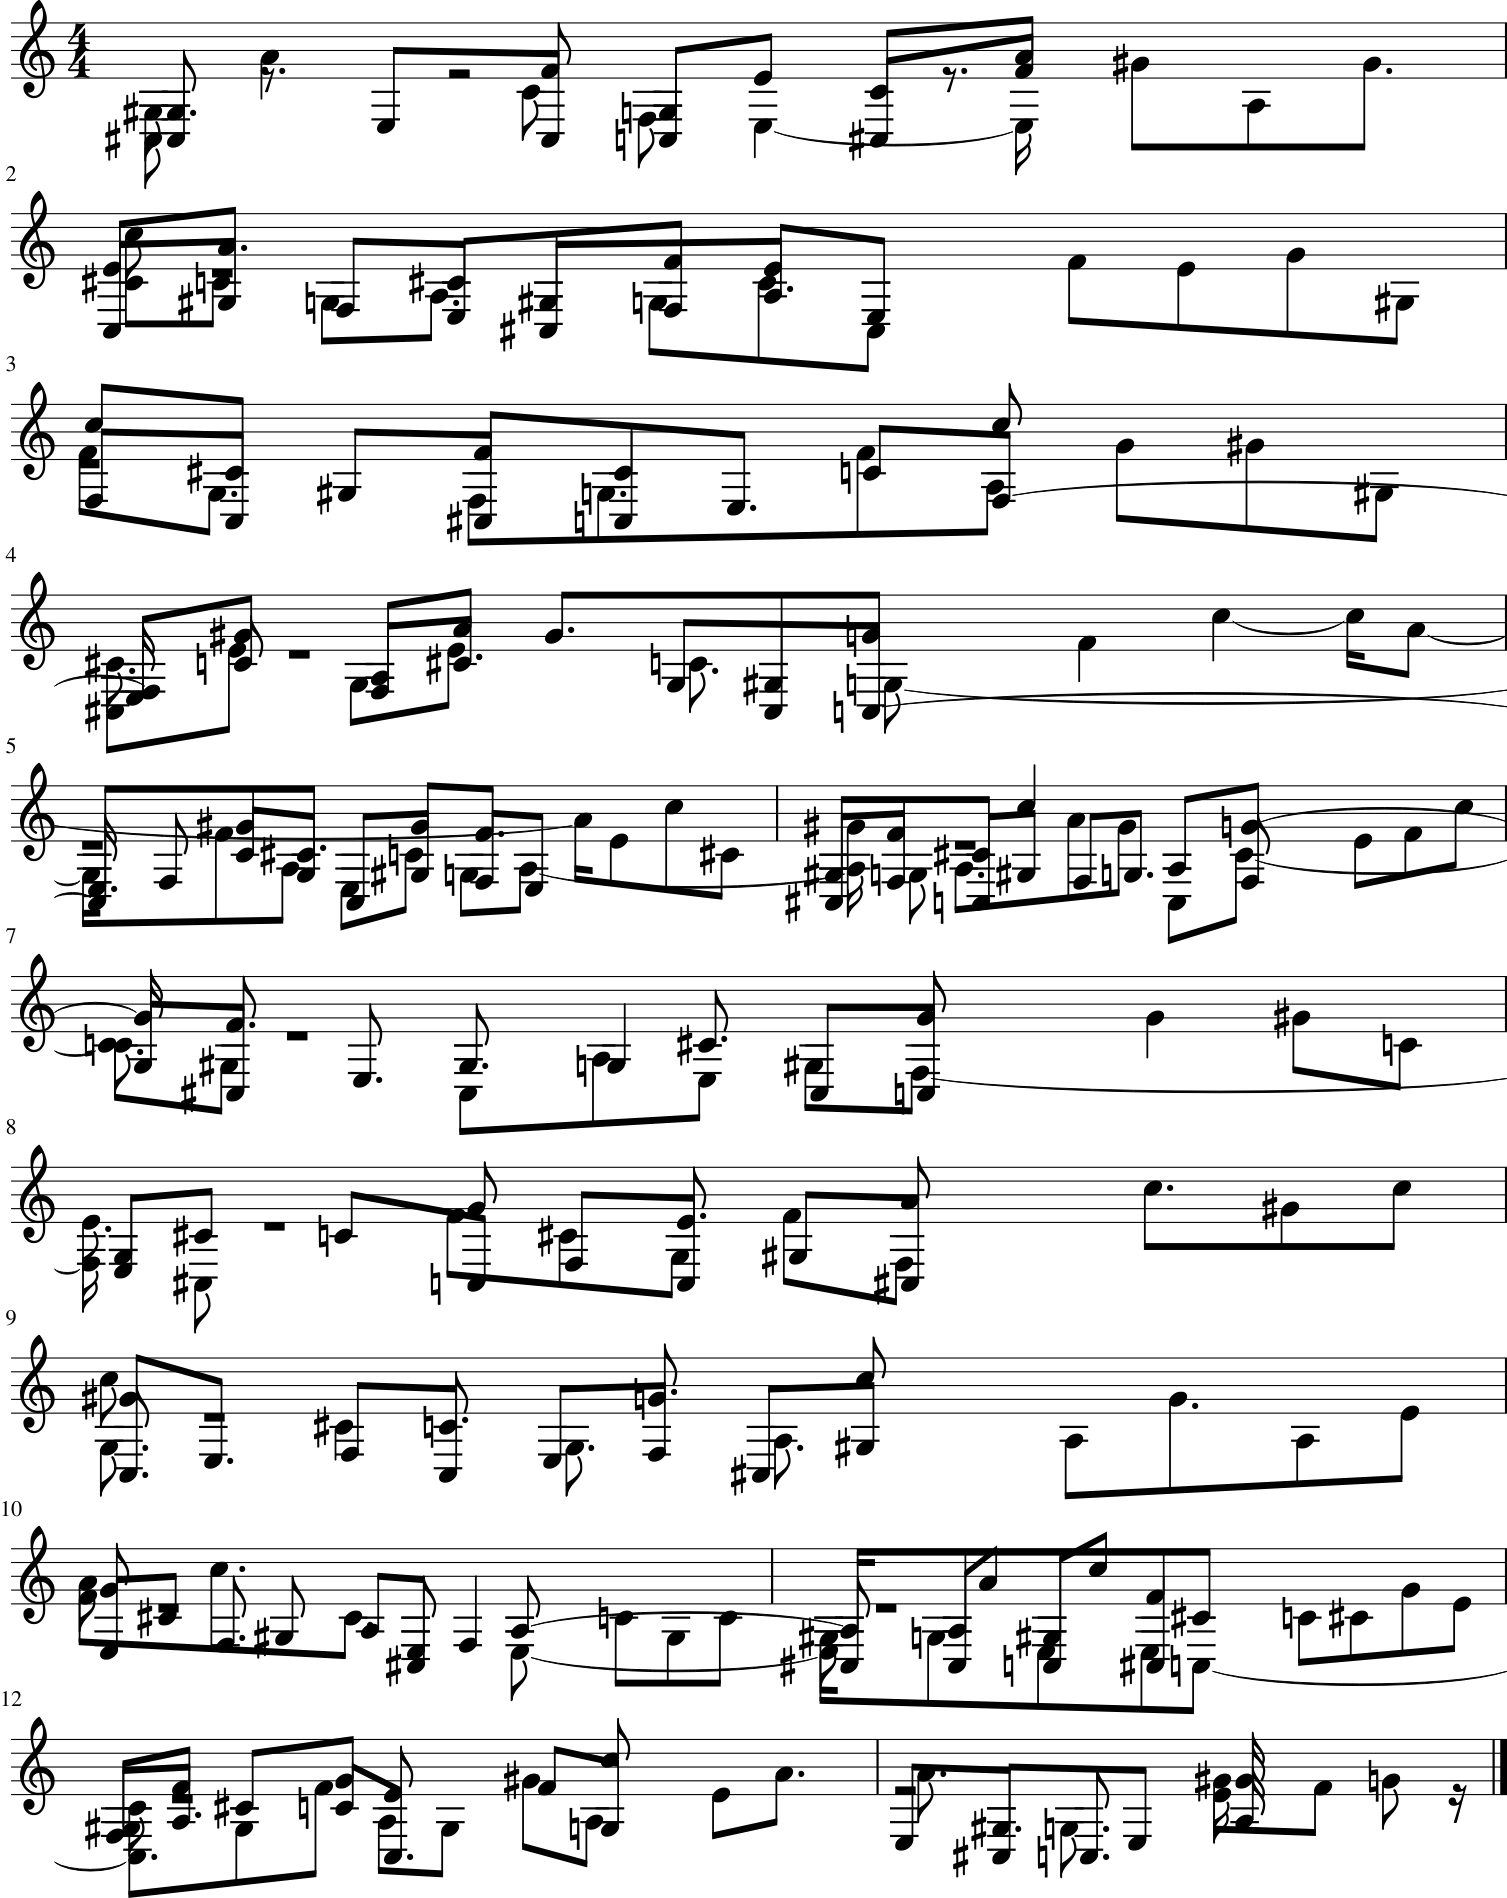

'out.mid'

In [140]:
stream = make_stream(data, scale_gipsy)
            
stream.show()
stream.write("midi", "out.mid")

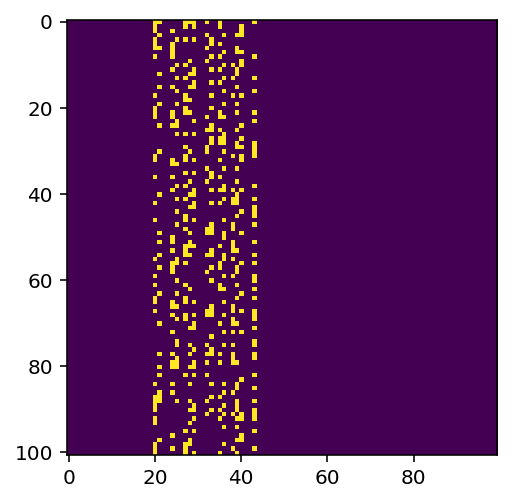

In [138]:
def preprocess_remove_nonscale(data, scale):
    data = np.asarray(data, dtype=np.bool)
    available_notes = np.array(list(scale.keys()))
    
    mask = np.zeros_like(data[0], dtype=np.bool)
    mask[available_notes] = True
    
    data = data * mask
    return data

plt.imshow(preprocess_remove_nonscale(data, scale))

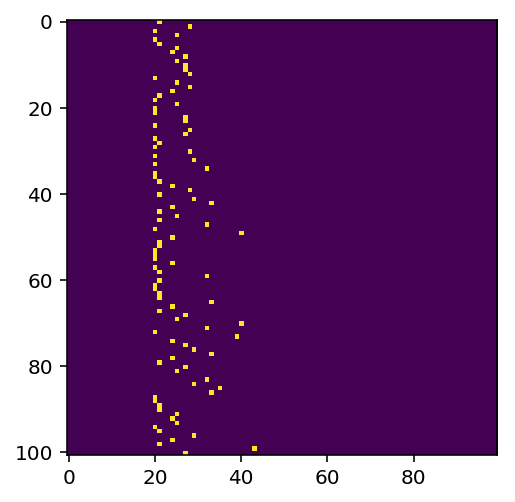

In [131]:
def preprocess_get_bottom(data, scale):
    data = preprocess_remove_nonscale(data, scale)
    for line in data:
        nonzeros = np.nonzero(line)[0]
        
        mask = np.zeros_like(line, dtype=np.bool)
        if len(nonzeros) > 0:
            mask[nonzeros[0]] = True
        line *= mask
    return data

plt.imshow(preprocess_get_bottom(data, scale))

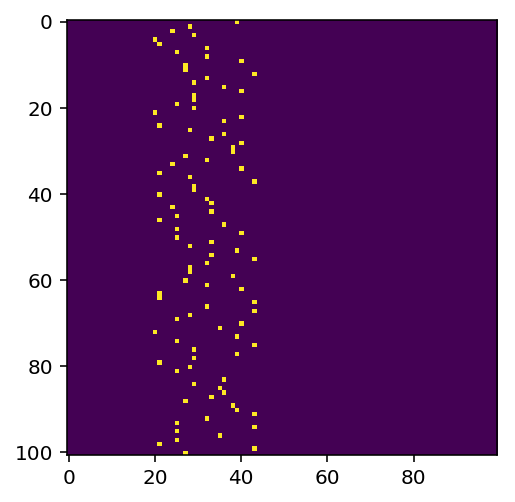

In [132]:
def preprocess_get_random(data, scale):
    data = preprocess_remove_nonscale(data, scale)
    for line in data:
        nonzeros = np.nonzero(line)[0]
        
        mask = np.zeros_like(line, dtype=np.bool)
        if len(nonzeros) > 0:
            mask[np.random.choice(nonzeros)] = True
        line *= mask
    return data

plt.imshow(preprocess_get_random(data, scale))

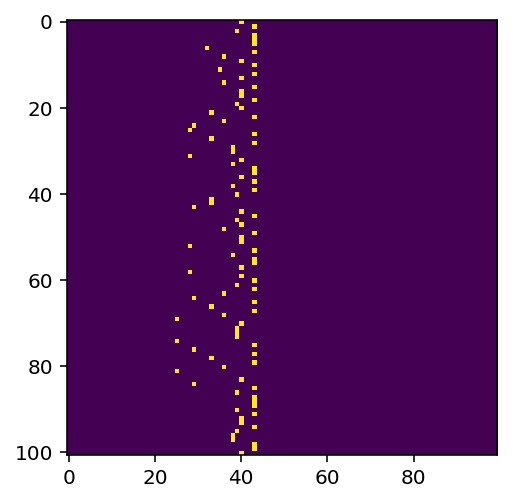

In [133]:
def preprocess_get_top(data, scale):
    data = preprocess_remove_nonscale(data, scale)
    for line in data:
        nonzeros = np.nonzero(line)[0]
        
        mask = np.zeros_like(line, dtype=np.bool)
        if len(nonzeros) > 0:
            mask[nonzeros[-1]] = True
        line *= mask
    return data

plt.imshow(preprocess_get_top(data, scale))

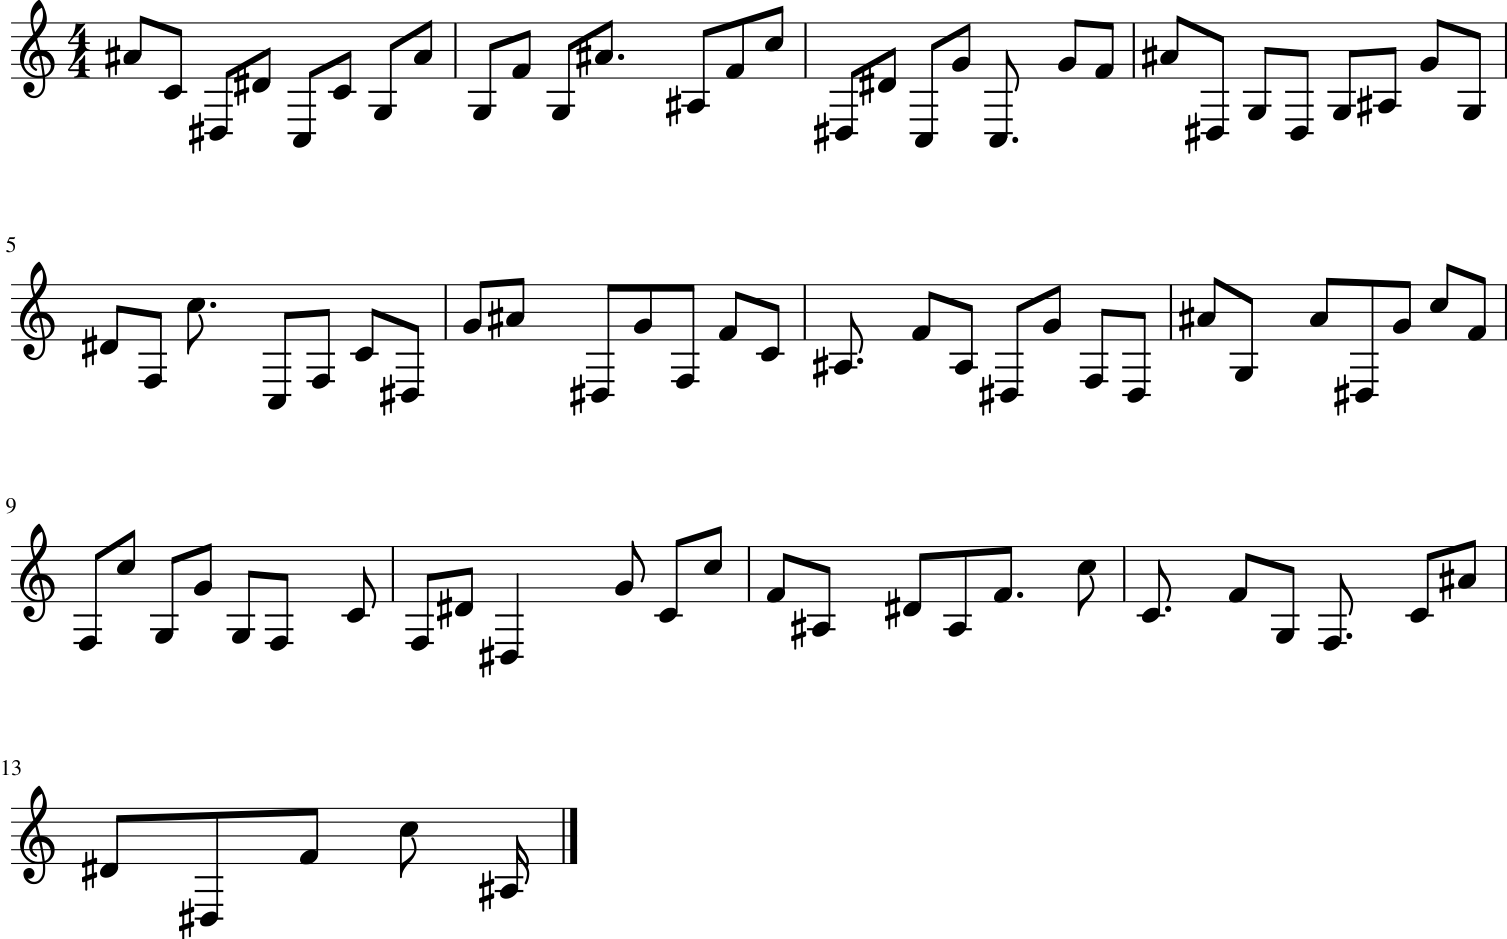

'out.mid'

In [128]:
stream = make_stream(data, scale_pentatonic, preprocessor=preprocess_get_random)
            
stream.show()
stream.write("midi", "out.mid")